In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

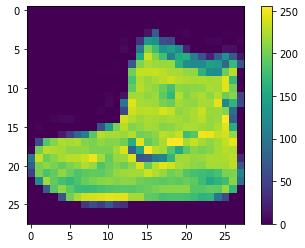

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

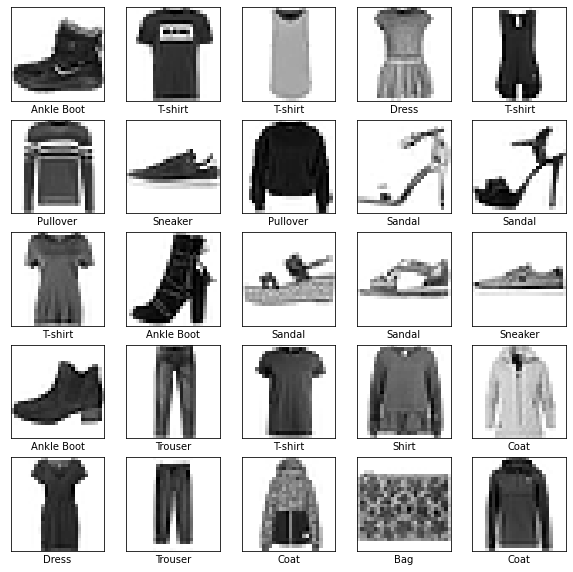

In [14]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
]) #input shape is 28 to 28

In [16]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5017 - accuracy: 0.8216
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3744 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3388 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3135 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2959 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2807 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2689 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2562 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2462 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.236

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ' , test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.8791
Test accuracy:  0.8791000247001648


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([6.2900398e-08, 3.3820243e-08, 5.7045185e-10, 8.4418465e-11,
       8.3257801e-09, 5.7041529e-04, 3.0532794e-07, 5.6205108e-04,
       1.4509585e-07, 9.9886703e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    

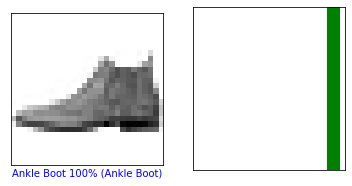

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

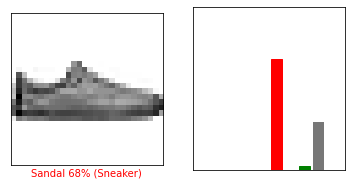

In [25]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

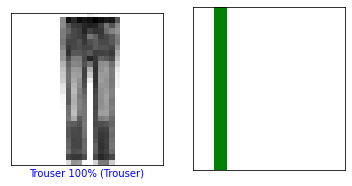

In [26]:
i = 15
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

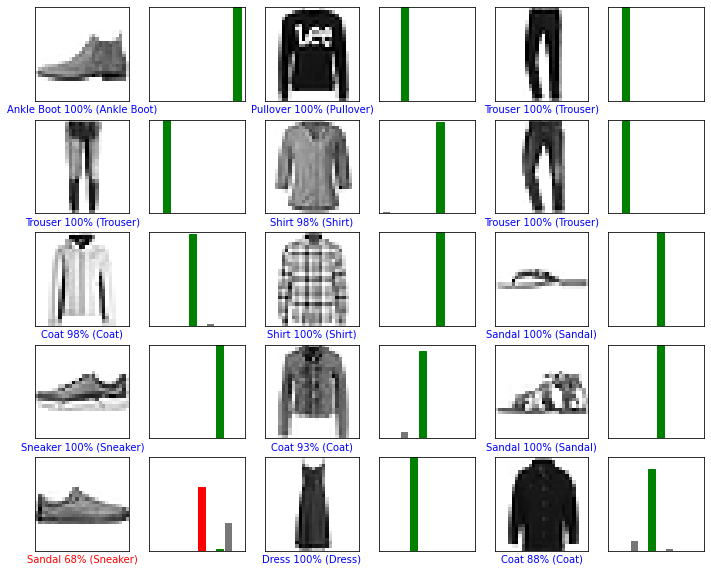

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i,predictions, test_labels)
plt.show()

In [28]:
img = test_images[0]

print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img.0))

print(img.shape)

SyntaxError: invalid syntax (<ipython-input-29-112aa8c33398>, line 1)

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(0, predictions_single , test_labels)
_ = plt.xticks(range(10), class_names, rotation =45 )